In [126]:
!pip install fcapy==0.1.4.1
!pip install frozendict sparselinear bitsets
!pip install torch-scatter -f https://data.pyg.org/whl/torch-1.12.1+cu113.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-1.12.1+cu113.html
!pip install torch-cluster -f https://data.pyg.org/whl/torch-1.12.1+cu113.html
!pip install git+https://github.com/pyg-team/pytorch_geometric.git
!pip install torch-scatter -f https://pytorch-geometric.com/whl/cpu/torch2.5.1+cu124.html
!pip install torch-cluster -f https://pytorch-geometric.com/whl/cpu/torch2.5.1+cu124.html
# 2.5.1+cu124
!pip install torch-scatter -f https://data.pyg.org/whl/torch-2.5.1+cu124.html


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Looking in links: https://data.pyg.org/whl/torch-1.12.1+cu113.html

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Looking in links: https://data.pyg.org/whl/torch-1.12.1+cu113.html

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Looking in links: https://data.pyg.org/whl/torch-1.12.1+cu113.html

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
  Cloning https://github.com/pyg-team/pytorch_geometric.git to /tmp/pip-req-build-0mi63nv9
  Running command git clone --filter=blob:none --quiet https://github.com/pyg-team/pytorch_geometric.git /tmp/pip-req-build-0mi63nv9
  Resolved https://g

In [ ]:
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn
!pip install shap


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report


In [2]:
file_path = 'input/income-data.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


### Column Description

* age: Age of the individual.
* workclass: Employment sector of the individual.
* fnlwgt: Final weight indicating the number of people in the population represented by the sample.
* education: Education level attained.
* educational-num: Numeric representation of education level.
* marital-status: Marital status.
* occupation: Type of work performed.
* relationship: Family relationship role.
* race: Race of the individual.
* gender: Gender of the individual.
* capital-gain: Income from investment sources, apart from salary.
* capital-loss: Loss from investment sources.
* hours-per-week: Hours worked per week.
* native-country: Country of origin.
* (Y) -> income: Income category (<=50K or >50K).

In [3]:
# Check for missing values or placeholders like '?'
missing_values = df.isin(['?']).sum()

# Replace '?' with NaN for cleaner handling of missing values
df.replace('?', pd.NA, inplace=True)

# Summarize data after initial cleaning
summary = {
    "Total Rows": len(df),
    "Missing Values Per Column": missing_values,
    "Unique Values Per Column": df.nunique()
}

summary_df = pd.DataFrame(summary)

In [4]:
summary_df

,Total Rows,Missing Values Per Column,Unique Values Per Column
age,48842,0,74
workclass,48842,2799,8
fnlwgt,48842,0,28523
education,48842,0,16
educational-num,48842,0,16
marital-status,48842,0,7
occupation,48842,2809,14
relationship,48842,0,6
race,48842,0,5
gender,48842,0,2


In [5]:
df.replace('?', np.nan, inplace=True)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,<NA>,103497,Some-college,10,Never-married,<NA>,Own-child,White,Female,0,0,30,United-States,<=50K


### Checking the percentage of Missing Values

In [6]:
df.isnull().sum() / df.shape[0]*100

age                0.000000
workclass          5.730724
fnlwgt             0.000000
education          0.000000
educational-num    0.000000
marital-status     0.000000
occupation         5.751198
relationship       0.000000
race               0.000000
gender             0.000000
capital-gain       0.000000
capital-loss       0.000000
hours-per-week     0.000000
native-country     1.754637
income             0.000000
dtype: float64

As the percentage of Null values is less than 5%

In [7]:
df.dropna(inplace = True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   fnlwgt           45222 non-null  int64 
 3   education        45222 non-null  object
 4   educational-num  45222 non-null  int64 
 5   marital-status   45222 non-null  object
 6   occupation       45222 non-null  object
 7   relationship     45222 non-null  object
 8   race             45222 non-null  object
 9   gender           45222 non-null  object
 10  capital-gain     45222 non-null  int64 
 11  capital-loss     45222 non-null  int64 
 12  hours-per-week   45222 non-null  int64 
 13  native-country   45222 non-null  object
 14  income           45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


Checking duplicates

In [9]:
df.duplicated().sum()

np.int64(47)

In [10]:
df.drop_duplicates(inplace= True)

Dropping the columns which have no relation on Y variable

In [11]:
df.drop(columns = ['capital-gain','capital-loss'], inplace= True)

<Figure size 1200x600 with 0 Axes>

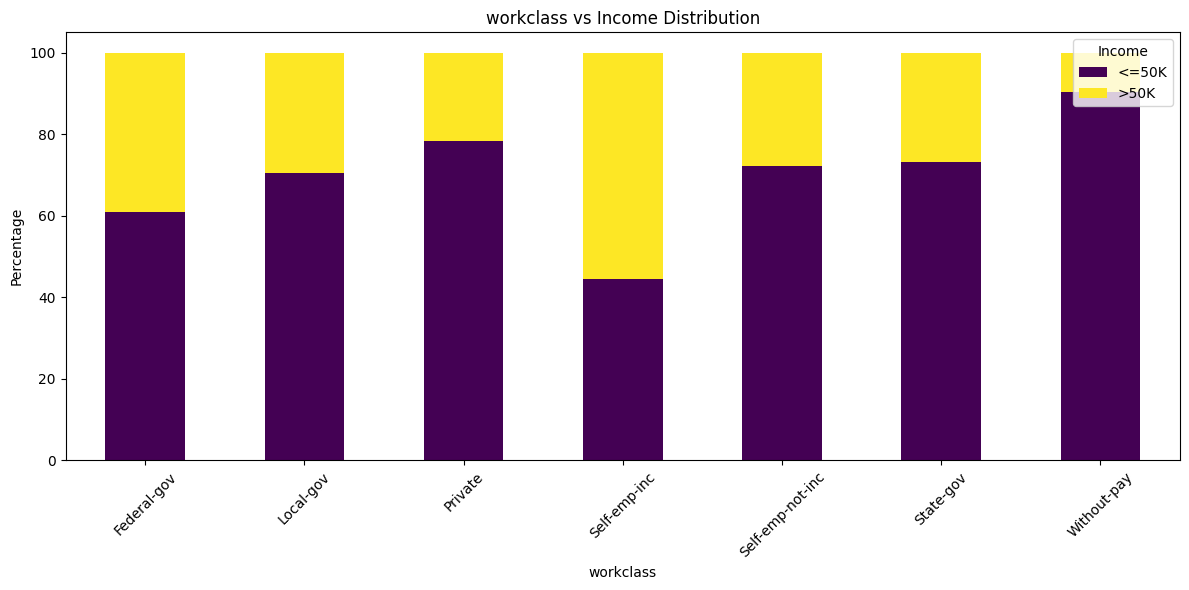

<Figure size 1200x600 with 0 Axes>

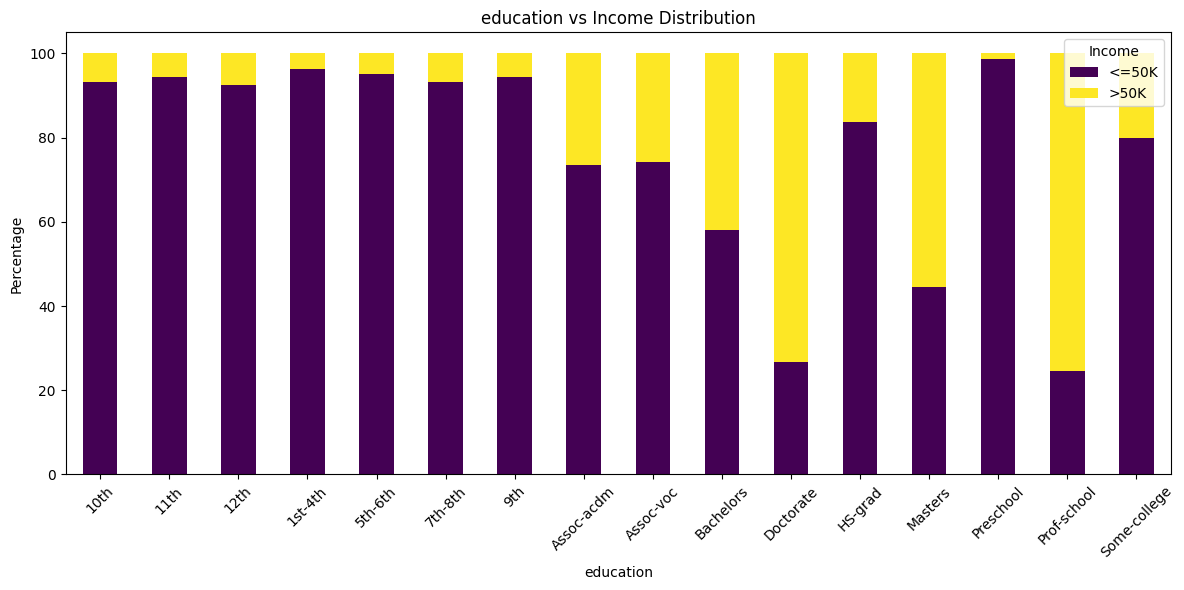

<Figure size 1200x600 with 0 Axes>

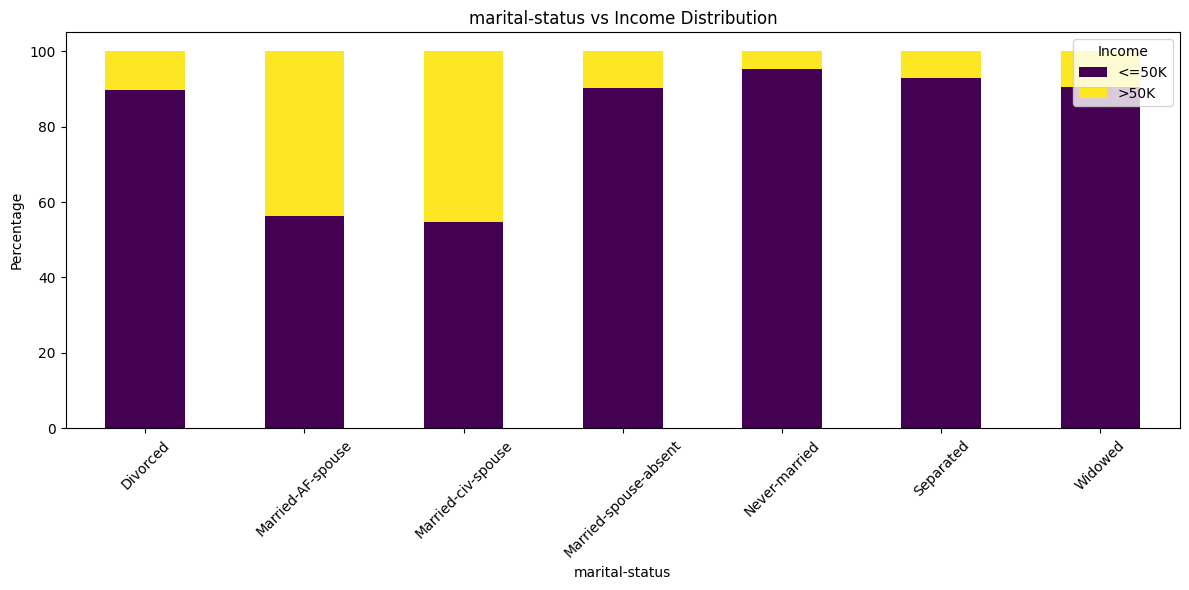

<Figure size 1200x600 with 0 Axes>

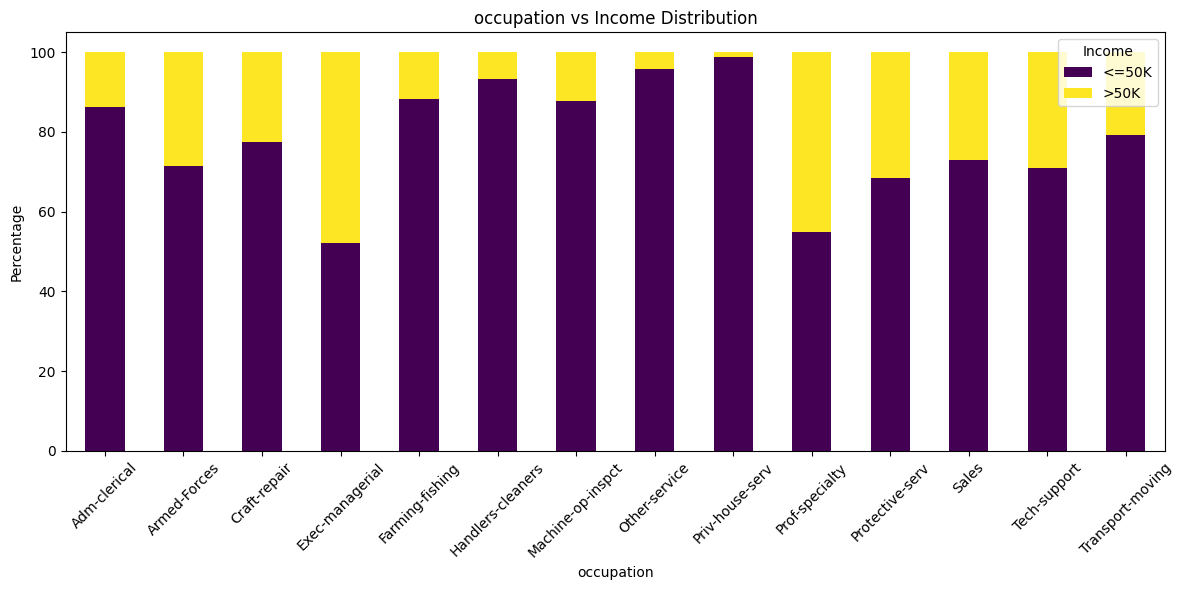

<Figure size 1200x600 with 0 Axes>

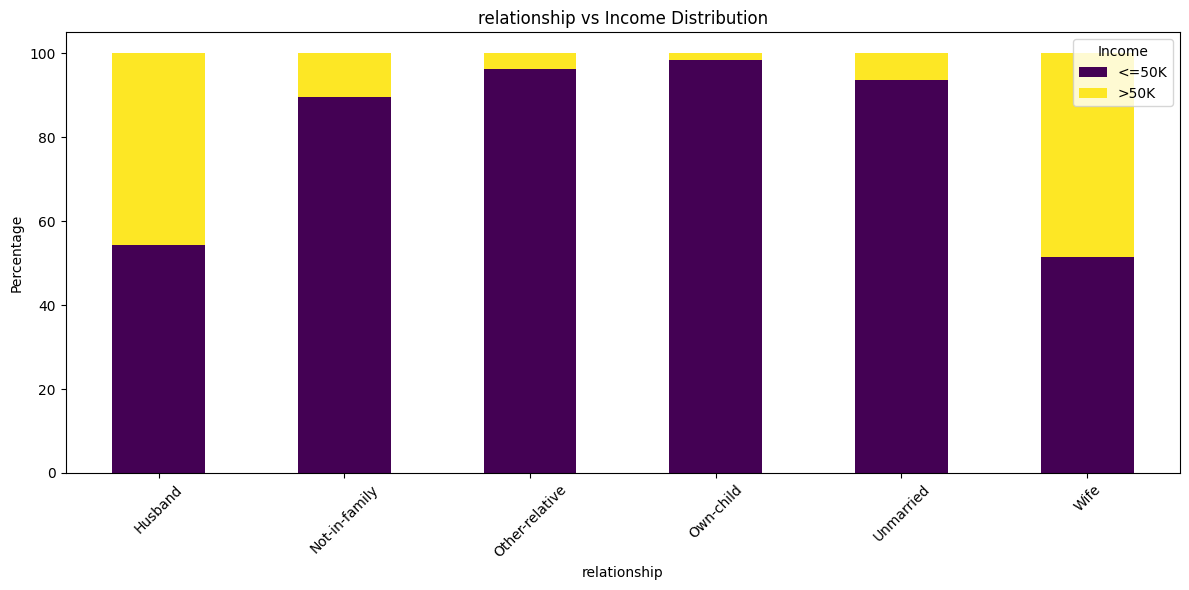

<Figure size 1200x600 with 0 Axes>

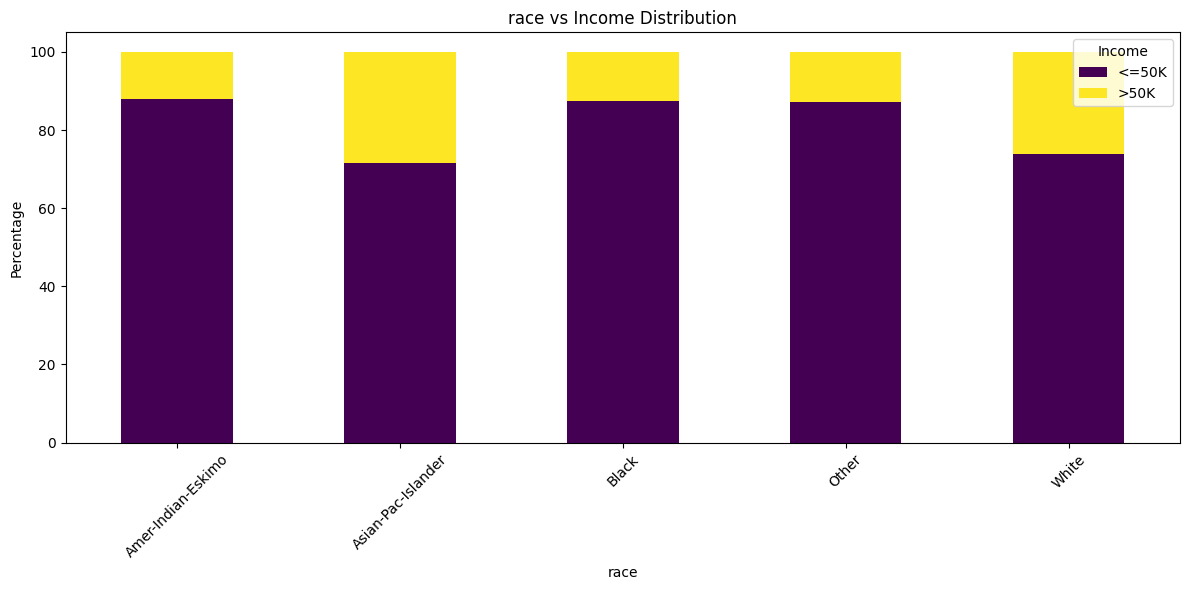

<Figure size 1200x600 with 0 Axes>

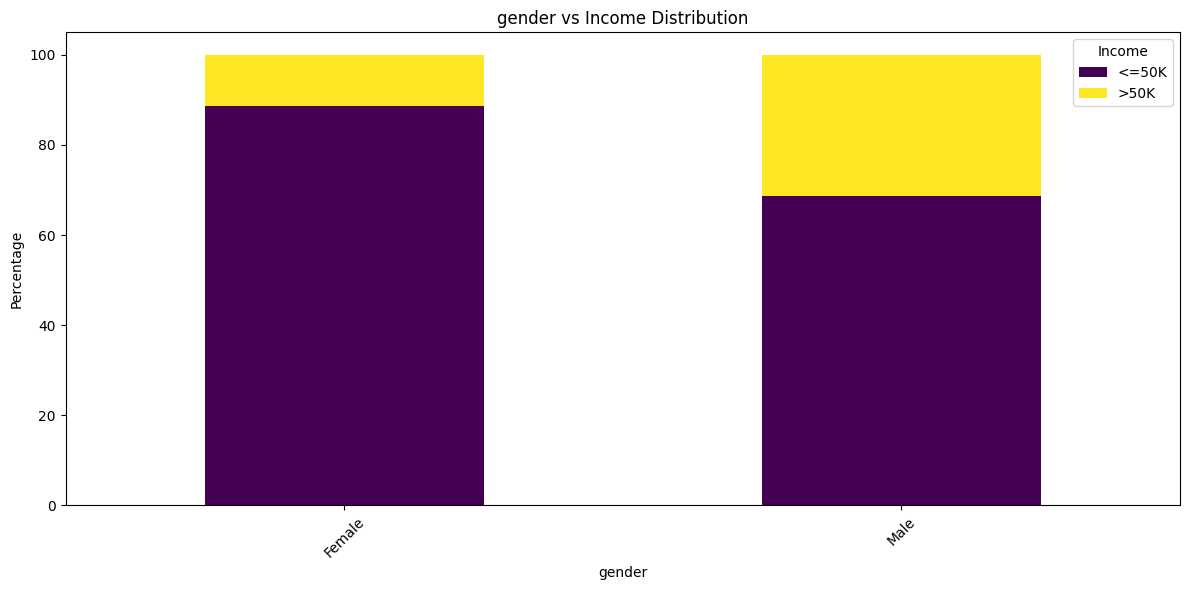

<Figure size 1200x600 with 0 Axes>

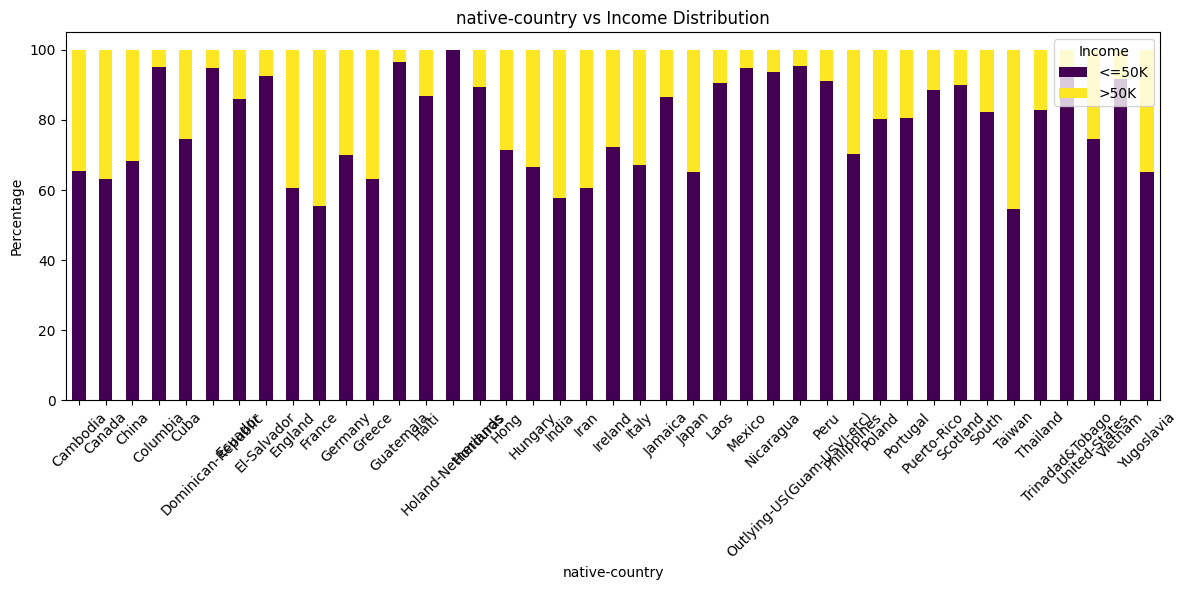

/tmp/ipykernel_2691436/4157181247.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='income', y=col, palette='Set2')


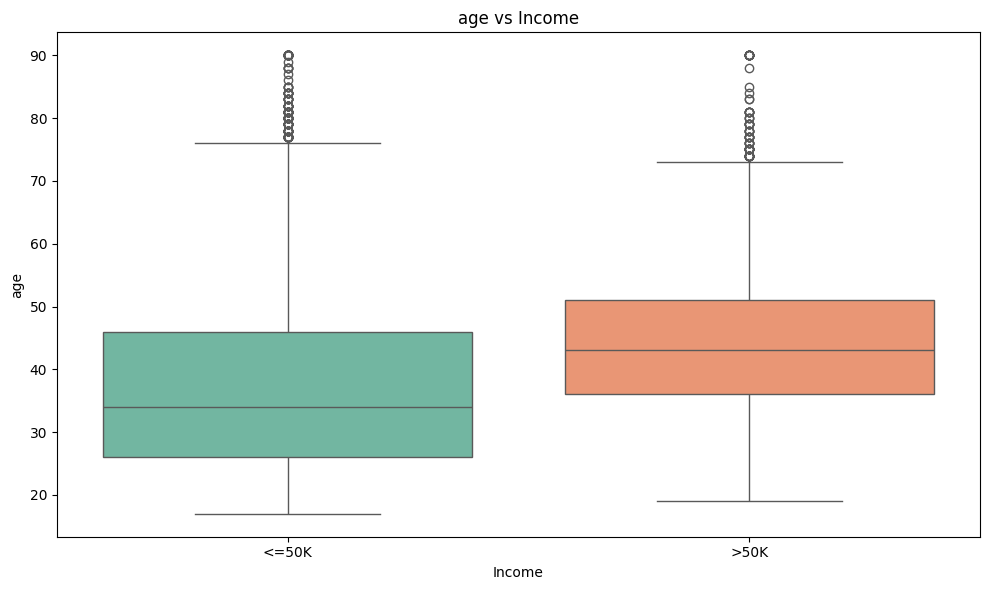

/tmp/ipykernel_2691436/4157181247.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='income', y=col, palette='Set2')


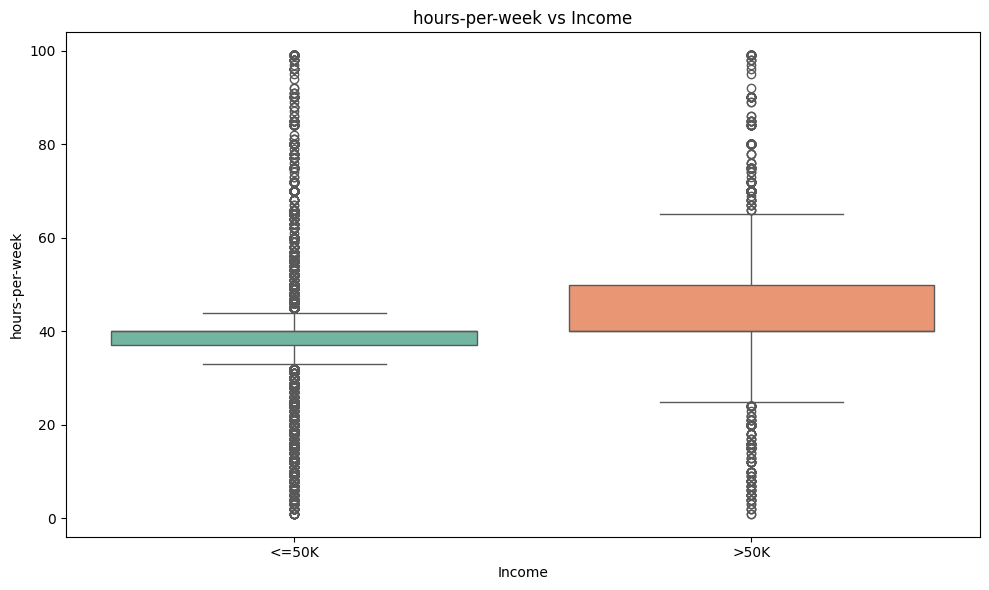

{'workclass': income                <=50K       >50K
 workclass                             
 Federal-gov       60.953058  39.046942
 Local-gov         70.483871  29.516129
 Private           78.218387  21.781613
 Self-emp-inc      44.559271  55.440729
 Self-emp-not-inc  72.094862  27.905138
 State-gov         73.278520  26.721480
 Without-pay       90.476190   9.523810,
 'education': income            <=50K       >50K
 education                         
 10th          93.295176   6.704824
 11th          94.502779   5.497221
 12th          92.521739   7.478261
 1st-4th       96.363636   3.636364
 5th-6th       95.078300   4.921700
 7th-8th       93.309002   6.690998
 9th           94.378698   5.621302
 Assoc-acdm    73.589914  26.410086
 Assoc-voc     74.259448  25.740552
 Bachelors     57.983860  42.016140
 Doctorate     26.654412  73.345588
 HS-grad       83.656060  16.343940
 Masters       44.568245  55.431755
 Preschool     98.571429   1.428571
 Prof-school   24.585987  75.414013
 

In [12]:
# Relationship of categorical features with the target variable 'income'
categorical_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']

categorical_relationships = {}

for col in categorical_cols:
    # Count distribution of income for each category in the column
    relationship = df.groupby([col, 'income']).size().unstack()
    relationship_percentage = relationship.div(relationship.sum(axis=1), axis=0) * 100
    categorical_relationships[col] = relationship_percentage

    # Plot the relationship
    plt.figure(figsize=(12, 6))
    relationship_percentage.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
    plt.title(f'{col} vs Income Distribution')
    plt.ylabel('Percentage')
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.legend(title='Income', loc='upper right')
    plt.tight_layout()
    plt.show()

# Relationship of numerical features with the target variable 'income'
numerical_cols = ['age', 'hours-per-week']

for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='income', y=col, palette='Set2')
    plt.title(f'{col} vs Income')
    plt.xlabel('Income')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

# Return a summary of categorical relationships
categorical_relationships


In [13]:
df.shape

(45175, 13)

In [62]:
# Preprocessing
# Encode the target variable
label_encoder = LabelEncoder()
df['income'] = label_encoder.fit_transform(df['income'])

# Separate features and target
X = df.drop('income', axis=1)
y = df['income']

# Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define classifiers to evaluate
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Support Vector Machine': SVC(probability=True, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}
results = {}

# Train and evaluate each model
for model_name, model in classifiers.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # Evaluate model
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    target_names = label_encoder.classes_.astype(str)
    report = classification_report(y_test, y_pred, target_names=target_names)
    
    # Store the results
    results[model_name] = {
        'Accuracy': accuracy,
        'ROC AUC': roc_auc,
        'Classification Report': report
    }

# Display results
for model_name, metrics in results.items():
    print(f"\n{model_name} Evaluation")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"ROC AUC: {metrics['ROC AUC']:.4f}")
    print("Classification Report:")
    print(metrics['Classification Report'])

# Optionally, parse classification report into DataFrame for better comparison
report_dicts = {}
for model_name, metrics in results.items():
    report_dict = classification_report(y_test, classifiers[model_name].predict(X_test), target_names=label_encoder.classes_, output_dict=True)
    report_dicts[model_name] = pd.DataFrame(report_dict).transpose()

# Display classification report as DataFrame for all models
for model_name, report_df in report_dicts.items():
    print(f"\n{model_name} Classification Report as DataFrame:")
    print(report_df)



Random Forest Evaluation
Accuracy: 0.8173
ROC AUC: 0.8655
Classification Report:
              precision    recall  f1-score   support

       <=50K       0.86      0.91      0.88     10192
        >50K       0.66      0.55      0.60      3361

    accuracy                           0.82     13553
   macro avg       0.76      0.73      0.74     13553
weighted avg       0.81      0.82      0.81     13553


Logistic Regression Evaluation
Accuracy: 0.8277
ROC AUC: 0.8823
Classification Report:
              precision    recall  f1-score   support

       <=50K       0.86      0.92      0.89     10192
        >50K       0.69      0.55      0.61      3361

    accuracy                           0.83     13553
   macro avg       0.78      0.73      0.75     13553
weighted avg       0.82      0.83      0.82     13553


Support Vector Machine Evaluation
Accuracy: 0.8284
ROC AUC: 0.8633
Classification Report:
              precision    recall  f1-score   support

       <=50K       0.86      0

# Explainability of the classification Models

In [63]:
for model_name, model in classifiers.items():
    if isinstance(model, (RandomForestClassifier, GradientBoostingClassifier)):
        importances = model.feature_importances_
        feature_importance_df = pd.DataFrame({
            'Feature': X.columns,
            'Importance': importances
        }).sort_values(by='Importance', ascending=False)
        
        print(f"\n{model_name} Feature Importances:")
        print(feature_importance_df)


Random Forest Feature Importances:
                                      Feature    Importance
1                                      fnlwgt  2.083999e-01
0                                         age  1.814678e-01
26          marital-status_Married-civ-spouse  1.015107e-01
3                              hours-per-week  9.869256e-02
2                             educational-num  6.935374e-02
..                                        ...           ...
86                    native-country_Scotland  5.928672e-05
80  native-country_Outlying-US(Guam-USVI-etc)  4.856917e-05
68                    native-country_Honduras  2.280523e-05
31                    occupation_Armed-Forces  1.716055e-05
67          native-country_Holand-Netherlands  1.406797e-07

[94 rows x 2 columns]

Gradient Boosting Feature Importances:
                                      Feature  Importance
26          marital-status_Married-civ-spouse    0.478214
2                             educational-num    0.280544
0      

In [ ]:
from sklearn.inspection import permutation_importance

# Permutation importance for RandomForest
result = permutation_importance(classifiers['Random Forest'], X_test, y_test, n_repeats=10, random_state=42)

# Display the feature importances
perm_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=False)

print("Permutation Importance:")
print(perm_importance_df[10])

Permutation Importance:
                              Feature  Importance
26  marital-status_Married-civ-spouse    0.026784
0                                 age    0.014410
2                     educational-num    0.009976
3                      hours-per-week    0.008271
28       marital-status_Never-married    0.003365
..                                ...         ...
4                 workclass_Local-gov   -0.001586
32            occupation_Craft-repair   -0.002132
20                  education_HS-grad   -0.002435
24             education_Some-college   -0.002612
18                education_Bachelors   -0.003239

[94 rows x 2 columns]


In [66]:
perm_importance_df[:20]

,Feature,Importance
26,marital-status_Married-civ-spouse,0.026784
0,age,0.014410
2,educational-num,0.009976
3,hours-per-week,0.008271
28,marital-status_Never-married,0.003365
7,workclass_Self-emp-not-inc,0.002147
33,occupation_Exec-managerial,0.001815
37,occupation_Other-service,0.001778
35,occupation_Handlers-cleaners,0.001358
34,occupation_Farming-fishing,0.001107


# **Applying Binarization for Neural FCA**

In [5]:
file_path = 'input/income-data.csv'
df = pd.read_csv(file_path)

In [6]:
# Replace '?' with NaN for proper cleaning
data_cleaned = df.replace('?', pd.NA)

# Remove rows with any missing values (including replaced '?')
data_cleaned = data_cleaned.dropna()
data_cleaned.drop(columns = ['capital-gain','capital-loss'], inplace= True)
# Separate X and Y again after cleaning
# X = data_cleaned.drop(columns=['income'])
# Y = data_cleaned['income']

# Display the updated shapes of X and Y
# X.shape, Y.shape
X = data_cleaned

# Finding Unique values in each Column

In [7]:
# Count unique values for each column in X
unique_values_count = X.nunique()

# Display the unique values count for each column
unique_values_count

age                   74
workclass              7
fnlwgt             26741
education             16
educational-num       16
marital-status         7
occupation            14
relationship           6
race                   5
gender                 2
hours-per-week        96
native-country        41
income                 2
dtype: int64

In [8]:
# Create a dataframe to store the unique values for each column
unique_values_df = pd.DataFrame({
    'Column': X.columns,
    'Unique Values': [X[col].unique().tolist() for col in X.columns]
})

In [9]:
unique_values_df

,Column,Unique Values
0,age,"[25, 38, 28, 44, 34, 63, 24, 55, 65, 36, 26, 4..."
1,workclass,"[Private, Local-gov, Self-emp-not-inc, Federal..."
2,fnlwgt,"[226802, 89814, 336951, 160323, 198693, 104626..."
3,education,"[11th, HS-grad, Assoc-acdm, Some-college, 10th..."
4,educational-num,"[7, 9, 12, 10, 6, 15, 4, 13, 14, 3, 11, 5, 16,..."
5,marital-status,"[Never-married, Married-civ-spouse, Widowed, S..."
6,occupation,"[Machine-op-inspct, Farming-fishing, Protectiv..."
7,relationship,"[Own-child, Husband, Not-in-family, Unmarried,..."
8,race,"[Black, White, Other, Amer-Indian-Eskimo, Asia..."
9,gender,"[Male, Female]"


In [10]:
X.income

0        <=50K
1        <=50K
2         >50K
3         >50K
5        <=50K
         ...  
48837    <=50K
48838     >50K
48839    <=50K
48840    <=50K
48841     >50K
Name: income, Length: 45222, dtype: object

In [11]:
X['income'] = X['income'].apply(lambda x: 1 if x.strip() == '>50K' else 0)

In [12]:
X

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,1
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,0
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,1
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,0
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,0


In [13]:
X

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,1
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,0
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,1
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,0
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,0


In [14]:
X_binarized = X.copy()

# Age
Let's define age ranges and create a binary variable for each range:

* <18 (Underage)
* 18-24
* 25-34
* 35-44
* 45-54
* 55-64
* 65+

In [15]:
age_bins = [0, 17, 24, 34, 44, 54, 64, np.inf]
age_labels = ['under_18', '18_24', '25_34', '35_44', '45_54', '55_64', '65_plus']
X['age_group'] = pd.cut(X['age'], bins=age_bins, labels=age_labels, right=False)
for label in age_labels:
    X['age_' + label] = (X['age_group'] == label).astype(int)

# workclass (Categorical Variable)
Reasoning:

workclass is a categorical variable with several distinct categories.
We'll create a binary variable for each category (one-hot encoding) to retain all information.


In [16]:
workclass_categories = X['workclass'].unique()
for category in workclass_categories:
    X['workclass_' + category] = (X['workclass'] == category).astype(int)

# fnlwgt (Numerical Variable)
Reasoning:

fnlwgt is a continuous variable representing the final weight.
Binarizing it without loss requires transforming it into meaningful binary variables.
We can create bins (e.g., low, medium, high) based on quantiles.

In [17]:
# Binarize 'fnlwgt'
fnlwgt_quartiles = pd.qcut(X['fnlwgt'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
for quartile in ['Q1', 'Q2', 'Q3', 'Q4']:
    X['fnlwgt_' + quartile] = (fnlwgt_quartiles == quartile).astype(int)

# education (Categorical Variable)
Reasoning:

education has multiple distinct levels.
Create a binary variable for each education level.

In [18]:
educational_num_values = X['educational-num'].unique()

for value in educational_num_values:
    X['educational_num_' + str(value)] = (X['educational-num'] == value).astype(int)

# educational-num (Numerical Variable)
Reasoning:

Represents the number of years of education.
We can create binary variables for different education stages.
Define Education Stages:

* Less than High School (educational-num < 9)
* High School Graduate (educational-num == 9)
* Some College (educational-num == 10 or 11)
* Bachelors (educational-num == 13)
* Advanced Degree (educational-num > 13)


In [19]:
educational_num_values = X['educational-num'].unique()

for value in educational_num_values:
    X['educational_num_' + str(value)] = (X['educational-num'] == value).astype(int)

# marital-status (Categorical Variable)
Reasoning:

Create binary variables for each marital status.

In [20]:
marital_status_categories = X['marital-status'].unique()

for category in marital_status_categories:
    X['marital_status_' + category] = (X['marital-status'] == category).astype(int)


# occupation (Categorical Variable)
Reasoning:

Create binary variables for each occupation category.

In [21]:
occupation_categories = X['occupation'].unique()

for category in occupation_categories:
    X['occupation_' + category] = (X['occupation'] == category).astype(int)

# relationship (Categorical Variable)
Reasoning:

Create binary variables for each relationship status.

In [22]:
relationship_categories = X['relationship'].unique()

for category in relationship_categories:
    X['relationship_' + category] = (X['relationship'] == category).astype(int)

# race (Categorical Variable)
Reasoning:

Create binary variables for each race category.


In [23]:
race_categories = X['race'].unique()

for category in race_categories:
    X['race_' + category] = (X['race'] == category).astype(int)

# gender (Binary Categorical Variable)
Reasoning:

gender is binary.
We'll map 'Male' to 1 and 'Female' to 0.


In [24]:
X['gender_male'] = (X['gender'] == 'Male').astype(int)

# hours-per-week (Numerical Variable)
Reasoning:

To retain information, create bins representing work hours.
Define categories like part-time, full-time, over-time.
Define Work Hour Categories:

* Part-time (< 35 hours)
* Full-time (35-40 hours)
* Over-time (> 40 hours)


In [25]:
# Define hours per week ranges and labels
hours_bins = [0, 34, 40, np.inf]
hours_labels = ['part_time', 'full_time', 'over_time']

# Create hours group categories
X['hours_group'] = pd.cut(X['hours-per-week'], bins=hours_bins, labels=hours_labels, right=True)

# Create binary columns for each hours group
for label in hours_labels:
    X['hours_' + label] = (X['hours_group'] == label).astype(int)


# native-country (Categorical Variable)
Reasoning:

Create binary variables for each country.
For a more manageable number of variables, group countries into regions.


In [26]:
# Define country to region mapping
country_to_region = {
    'United-States': 'North America',
    'Canada': 'North America',
    'Outlying-US(Guam-USVI-etc)': 'North America',
    # Central America
    'Mexico': 'Central America',
    'Puerto-Rico': 'Central America',
    'Honduras': 'Central America',
    'Cuba': 'Central America',
    'Jamaica': 'Central America',
    'Haiti': 'Central America',
    'Dominican-Republic': 'Central America',
    'Guatemala': 'Central America',
    'Nicaragua': 'Central America',
    'El-Salvador': 'Central America',
    'Trinadad&Tobago': 'Central America',
    # South America
    'Columbia': 'South America',
    'Ecuador': 'South America',
    'Peru': 'South America',
    # Asia
    'India': 'Asia',
    'Japan': 'Asia',
    'China': 'Asia',
    'Iran': 'Asia',
    'Philippines': 'Asia',
    'Vietnam': 'Asia',
    'Hong': 'Asia',
    'Thailand': 'Asia',
    'Cambodia': 'Asia',
    'Laos': 'Asia',
    'Taiwan': 'Asia',
    # Europe
    'England': 'Europe',
    'Germany': 'Europe',
    'Greece': 'Europe',
    'Italy': 'Europe',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'Ireland': 'Europe',
    'France': 'Europe',
    'Scotland': 'Europe',
    'Yugoslavia': 'Europe',
    'Hungary': 'Europe',
    'Holand-Netherlands': 'Europe',
    # Other
    'South': 'Other',
    # Add any additional mappings if necessary
}

# Map countries to regions
X['region'] = X['native-country'].map(country_to_region)

# Fill NaN values with 'Other'
X['region'] = X['region'].fillna('Other')

# Get unique regions
region_categories = X['region'].unique()

# Create binary columns for each region
for region in region_categories:
    X['native_country_' + region] = (X['region'] == region).astype(int)


In [27]:
columns_to_drop = [
    'age', 'age_group',
    'workclass',
    'fnlwgt',
    'education',
    'educational-num',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'gender',
    'hours-per-week', 'hours_group',
    'native-country',
    'region'
]

# Drop the columns
X_binarized = X.drop(columns=columns_to_drop)

In [28]:
X_binarized

,income,age_under_18,age_18_24,age_25_34,age_35_44,age_45_54,age_55_64,age_65_plus,workclass_Private,workclass_Local-gov,...,gender_male,hours_part_time,hours_full_time,hours_over_time,native_country_North America,native_country_South America,native_country_Central America,native_country_Europe,native_country_Asia,native_country_Other
0,0,0,0,1,0,0,0,0,1,0,...,1,0,1,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,1,0,...,1,0,0,1,1,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,1,...,1,0,1,0,1,0,0,0,0,0
3,1,0,0,0,0,1,0,0,1,0,...,1,0,1,0,1,0,0,0,0,0
5,0,0,0,0,1,0,0,0,1,0,...,1,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0,0,0,1,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
48838,1,0,0,0,1,0,0,0,1,0,...,1,0,1,0,1,0,0,0,0,0
48839,0,0,0,0,0,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0
48840,0,0,1,0,0,0,0,0,1,0,...,1,1,0,0,1,0,0,0,0,0


In [29]:
# Convert the dataframe to boolean (True/False)
X_binarized = X_binarized.astype(bool)
X_binarized.index = X_binarized.index.astype(str)
# Check the data types to confirm

print(X_binarized.dtypes)
print(X_binarized.index.dtype)


income                            bool
age_under_18                      bool
age_18_24                         bool
age_25_34                         bool
age_35_44                         bool
                                  ... 
native_country_South America      bool
native_country_Central America    bool
native_country_Europe             bool
native_country_Asia               bool
native_country_Other              bool
Length: 77, dtype: object
object


In [30]:
import pandas as pd
from sklearn.utils import resample

# Assuming X is your features DataFrame and Y is the target variable

# Combine X and Y into a single DataFrame for easy manipulation
# df = pd.concat([X_binarized, Y_binarized], axis=1)
df = X_binarized
# Separate the majority and minority class samples
df_class_0 = df[df['income'] == 0]
df_class_1 = df[df['income'] == 1]

# Ensure you get 500 samples from each class
df_class_0_balanced = resample(df_class_0, replace=False, n_samples=500, random_state=42)
df_class_1_balanced = resample(df_class_1, replace=False, n_samples=500, random_state=42)

# Concatenate the balanced classes to form the final DataFrame
df_balanced = pd.concat([df_class_0_balanced, df_class_1_balanced])

# Shuffle the DataFrame to randomize the order of samples
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Now df_balanced has 1000 samples, with 500 from each class


In [31]:
import os

# Create the folder if it doesn't exist
os.makedirs('processed_data', exist_ok=True)

# Save the DataFrame to a CSV file
df_balanced.to_csv('processed/balanced_data.csv', index=False)

In [32]:
df_balanced.income

0       True
1       True
2       True
3       True
4      False
       ...  
995    False
996    False
997     True
998    False
999    False
Name: income, Length: 1000, dtype: bool

# **NEURAL FCA**

In [ ]:
!pip install bitarray==2.7.5

In [127]:
from fcapy.context import FormalContext
from fcapy.lattice import ConceptLattice
from fcapy.visualizer import LineVizNx
import matplotlib.pyplot as plt
import torch

plt.rcParams['figure.facecolor'] = (1,1,1,1)


AttributeError: module 'collections' has no attribute 'Mapping'

In [69]:
import neural_lib as nl

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X_binarized, Y_binarized, test_size=0.2, random_state=42)

In [98]:
X_train = X_train.sample(n=20, random_state=42)

y_train = y_train.sample(n=20, random_state=42)
# Convert the binarized dataframe into a Formal Context
reduced_columns = X_train.columns[:50]  # First 10 columns
X_train = X_train[reduced_columns]

In [99]:

K_train = FormalContext.from_pandas(X_train[reduced_columns])
# K_train = FormalContext.from_pandas(X_binarized)
print(K_train)


FormalContext (20 objects, 50 attributes, 115 connections)
     |age_under_18|age_18_24|age_25_34|age_35_44|age_45_54|...|occupation_Prof-specialty|occupation_Craft-repair|occupation_Adm-clerical|occupation_Exec-managerial|occupation_Tech-support|
41367|            |         |         |         |        X|...|                         |                      X|                       |                          |                       |
32646|            |         |         |         |         |...|                         |                       |                       |                          |                       |
8566 |            |        X|         |         |         |...|                         |                       |                       |                          |                       |
16994|            |         |         |        X|         |...|                         |                       |                       |                          |                     

# Build Monotone Concept Lattice

In [100]:
# Generate the monotone concept lattice
L = ConceptLattice.from_context(K_train, is_monotone=True)
print(f'Lattice has {len(L)} concepts.')

KeyboardInterrupt: 

In [75]:
L

# Calculate F1 Scores for Concepts

In [76]:
from sklearn.metrics import f1_score

# Calculate F1 scores for each concept in the lattice
f1_scores = []
for c in L:
    y_preds = np.zeros(K_train.n_objects)
    y_preds[list(c.extent_i)] = 1
    f1 = f1_score(y_train, y_preds)
    f1_scores.append(f1)

# Display the top 7 best concepts
best_concepts = np.argsort(f1_scores)[::-1][:7]
print(f'Best concepts: {best_concepts}')

Best concepts: [12  6 20 21 30 31 33]


In [77]:
f1_scores

[np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.6666666666666666),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.6666666666666666),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.5),
 np.float64(0.5),
 np.float64(0.0),
 np.float64(0.5),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.5),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.5),
 np.float64(0.5),
 np.float64(0.0),
 np.float64(0.5),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.5),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.5),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.5),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.4),
 np.float64(0.4),
 np.float64(0.4),
 np.float64(0.0),
 np.float64(0.4)

# Construct the Concept Network

In [78]:
import neural_lib as nl  # Assuming neural_lib is available

# Create a concept network from the lattice and selected best concepts
targets = sorted(set(y_train))  # The unique values in the target variable
cn = nl.ConceptNetwork.from_lattice(L, best_concepts, targets)

In [79]:
# Ensure that selected concepts cover all training objects
assert len({g_i for c in L[best_concepts] for g_i in c.extent_i}) == K_train.n_objects, "Selected concepts do not cover all train objects"

AssertionError: Selected concepts do not cover all train objects

In [80]:
# Setup visualization for the neural network architecture
vis = LineVizNx(node_label_font_size=14, node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes)) + '\n\n')


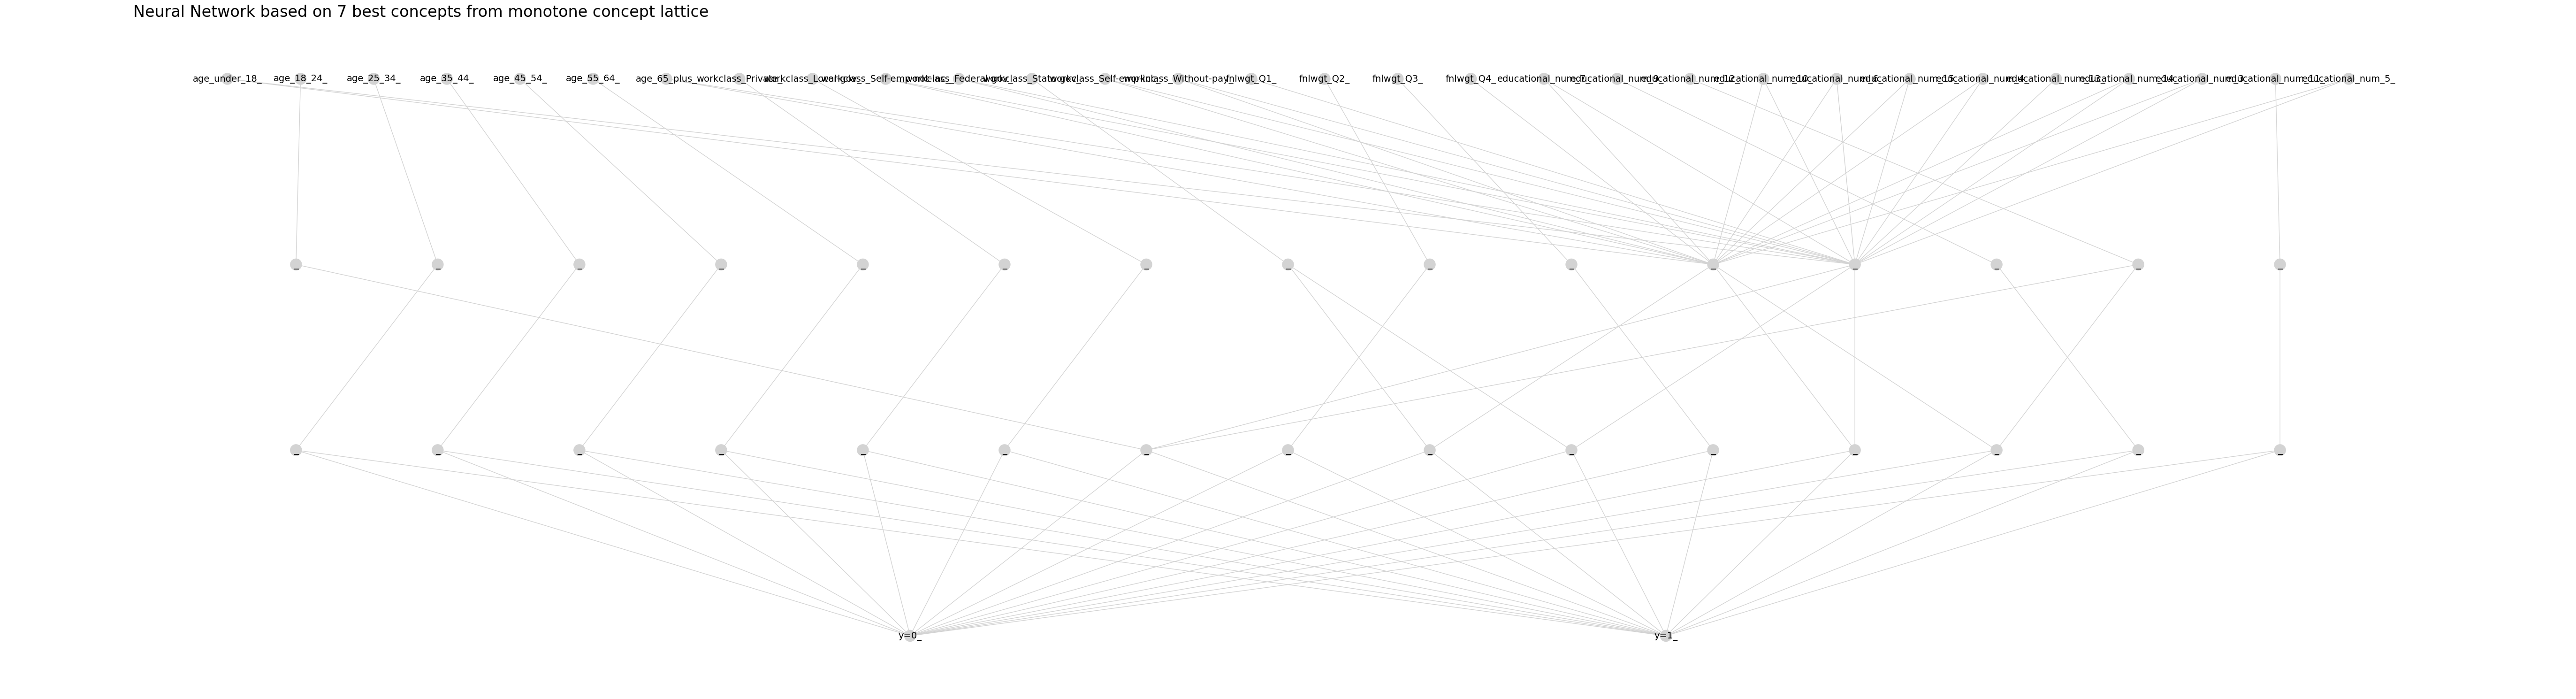

In [104]:
fig, ax = plt.subplots(figsize=(55, 15))
vis.draw_poset(
    cn.poset, ax=ax,
    flg_node_indices=False,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes), only_new_attrs=True) + '_'
)
plt.title('Neural Network based on 7 best concepts from monotone concept lattice', loc='left', x=0.05, size=24)
plt.tight_layout()
plt.show()

# Train the network on the training data

In [82]:
# Step 5: Train the network on the training data
cn.fit(X_train, y_train)

# Get predictions from the trained network

In [83]:
y_pred = cn.predict(X_test)
y_pred_proba = cn.predict_proba(X_test).detach().numpy()

In [84]:
print('Class predictions:', y_pred.numpy())
print('Class predictions with probabilities:', y_pred_proba)
print('True class labels:', y_test.values)

Class predictions: [0 0 0 ... 0 0 0]
Class predictions with probabilities: [[9.9827778e-01 1.7221686e-03]
 [9.9845827e-01 1.5417690e-03]
 [9.9705815e-01 2.9418138e-03]
 ...
 [9.9845827e-01 1.5417690e-03]
 [9.9919432e-01 8.0571853e-04]
 [9.9845922e-01 1.5408298e-03]]
True class labels: [0 0 1 ... 0 0 0]


# Visualize the fitted network with edge weights

In [85]:
edge_weights = cn.edge_weights_from_network()

/home/tk-lpt-0806/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sparselinear/sparselinear.py:301: UserWarning: torch.sparse.SparseTensor(indices, values, shape, *, device=) is deprecated.  Please use torch.sparse_coo_tensor(indices, values, shape, dtype=, device=). (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:651.)
  weight = torch.sparse.FloatTensor(self.indices, self.weights, (self.out_features, self.in_features))


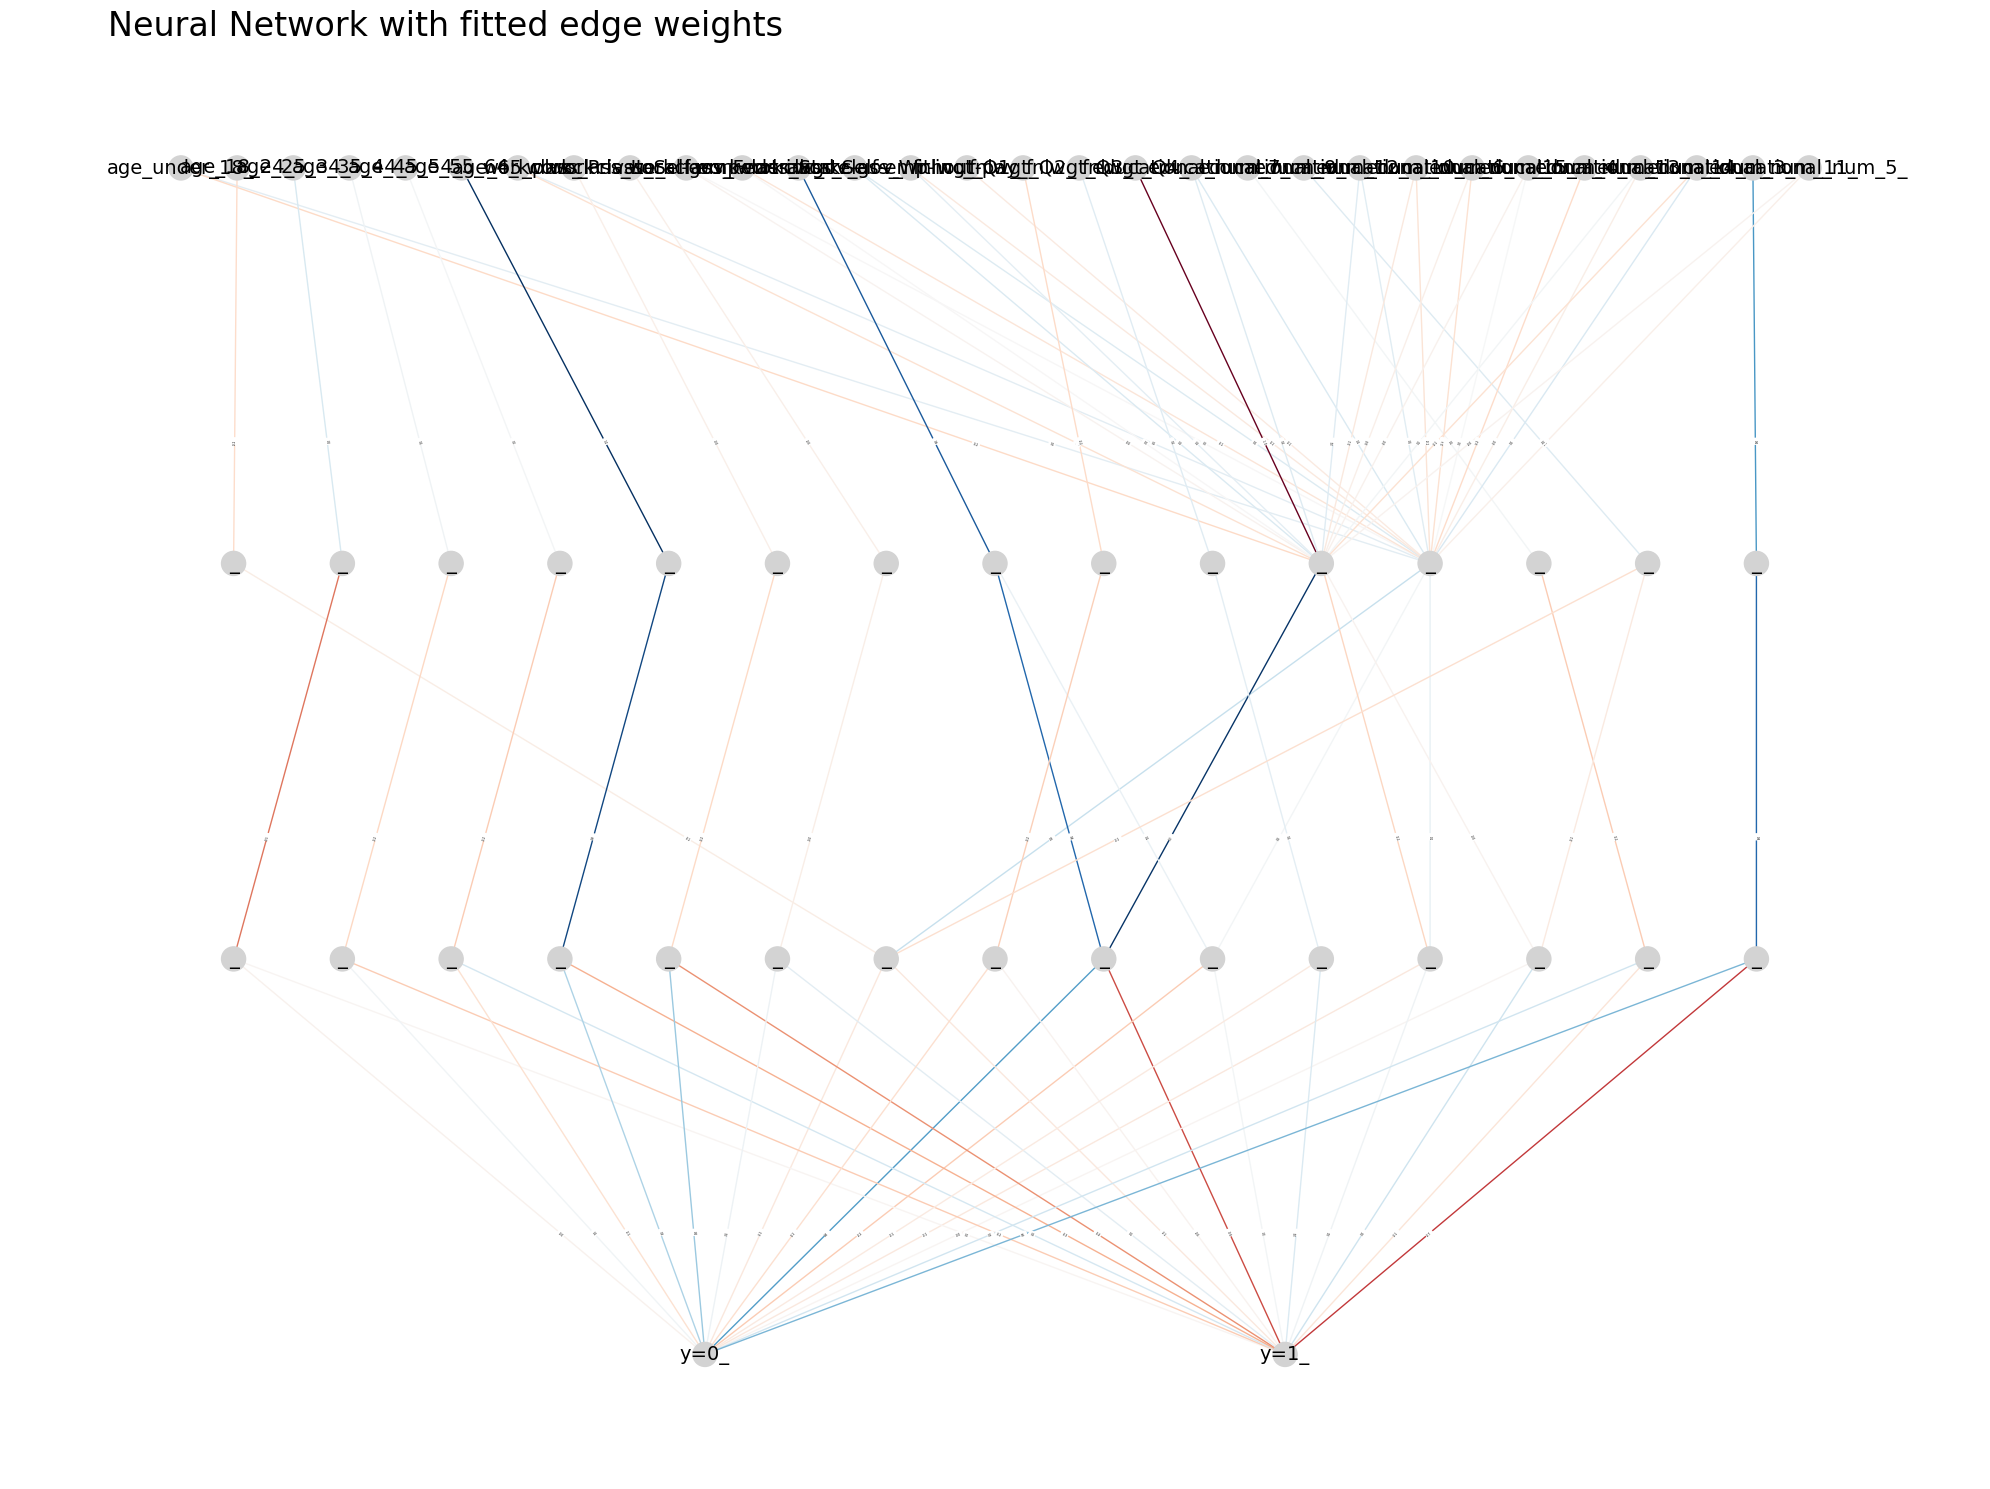

In [89]:
import networkx as nx
fig, ax = plt.subplots(figsize=(20, 15))
vis.draw_poset(
    cn.poset, ax=ax,
    flg_node_indices=False,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes), only_new_attrs=True) + '_',
    edge_color=[edge_weights[edge] for edge in cn.poset.to_networkx().edges],
    edge_cmap=plt.cm.RdBu,
)
nx.draw_networkx_edge_labels(cn.poset.to_networkx(), vis.mover.pos, {k: f"{v:.1f}" for k, v in edge_weights.items()}, label_pos=0.7, font_size=2,  )

plt.title('Neural Network with fitted edge weights', size=24, x=0.05, loc='left')
plt.tight_layout()
plt.show()

In [119]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 75.64%


In [120]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Precision: 0.00
Recall: 0.00
F1 Score: 0.00


/home/tk-lpt-0806/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Parallelize

In [ ]:
!pip install joblib


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [29]:
from sklearn.decomposition import PCA

# Assuming X_binarized is your data with 76 columns
pca = PCA(n_components=10)  # Keep the first 20 components (adjust as necessary)
X_reduced = pca.fit_transform(X_binarized)
X_reduced_df = pd.DataFrame(X_reduced, columns=[f'PC{i+1}' for i in range(X_reduced.shape[1])])


In [30]:
X_reduced_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-0.974933,0.539560,-0.910999,-0.090768,0.612876,-0.033177,0.391230,-0.527663,-0.297749,0.005504
1,1.186589,-0.456759,-0.002690,0.827285,-0.447540,0.334974,0.525841,0.707181,0.526126,-0.014049
2,0.827274,0.569856,-0.259374,-0.563917,0.804483,0.148700,-0.438057,0.297920,-0.708187,-0.251093
3,0.737634,0.819932,-0.195256,-0.608125,-0.318027,-0.383396,-0.832625,-0.395015,0.258450,0.539535
4,-0.869669,-0.614809,-0.156022,0.177153,-0.136597,0.487405,0.753377,-0.564957,0.270294,-0.536741
...,...,...,...,...,...,...,...,...,...,...
45217,-0.104692,0.643407,-0.075295,-0.284689,0.508329,0.285470,-0.447328,0.021303,-0.217263,0.727242
45218,0.905866,0.931084,-0.188957,0.596359,-0.451588,-0.055236,-0.265857,-0.187425,0.863251,-0.495119
45219,-0.636482,0.891935,0.538331,0.567544,-0.798799,-0.558755,-0.553499,-0.241897,0.105601,0.199004
45220,-1.062612,-0.391550,-1.231982,0.455344,-0.842293,0.004479,0.622591,-0.378588,-0.496726,-0.398223


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced_df, Y_binarized, test_size=0.2, random_state=42)

In [32]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(36177, 10)
(9045, 10)
(36177,)
(9045,)


In [ ]:
import numpy as np
import pandas as pd
import os
from joblib import Parallel, delayed
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import neural_lib as nl
from fcapy.context import FormalContext
from fcapy.lattice import ConceptLattice
from fcapy.visualizer import LineVizNx
import networkx as nx


def preprocess_data(X_train, y_train, sample_size, n_columns):
    """
    Function to preprocess and sample data, reducing rows and columns.
    """
    # Sample rows (subsample the data)
    X_sample = X_train.sample(n=sample_size, random_state=42)
    y_sample = y_train.sample(n=sample_size, random_state=42)

    # Select a subset of columns (first n_columns)
    reduced_columns = X_sample.columns[:n_columns]
    X_sample = X_sample[reduced_columns]
    
    return X_sample, y_sample

def build_lattice(X_sample, y_sample):
    """
    Build formal context and concept lattice for the given sample of data.
    """
    K_sample = FormalContext.from_pandas(X_sample)
    lattice = ConceptLattice.from_context(K_sample, is_monotone=True)
    for concept in lattice:
        print("Concept:", concept, "Extent:", concept.extent_i, "Intent:", concept.intent_i)
    return lattice, X_sample, y_sample  # Return X_sample and y_sample as well

def compute_f1_score(lattice, X_sample, y_sample):
    """
    Compute F1 score for each formal concept in the lattice.
    """
    f1_scores = []
    
    for concept in lattice:
        y_preds = np.zeros(X_sample.shape[0])
        y_preds[list(concept.extent_i)] = 1
        f1 = f1_score(y_sample, y_preds)
        f1_scores.append(f1)
    
    # Return the best concept based on the highest F1 score
    best_concept_idx = np.argmax(f1_scores)
    return best_concept_idx, f1_scores[best_concept_idx]

def draw_visualization(lattice, best_concept_idx, X_sample, y_sample, title="Concept Lattice Visualization", save_dir="visualizations"):
    """
    Draw the visualization of the concept lattice and highlight the best concept.
    Also saves the visualization in a specified folder.

    Parameters:
    - lattice: the concept lattice to visualize.
    - best_concept_idx: the index of the best concept based on F1 score.
    - X_sample, y_sample: sample data used for visualization (not directly used in visualization but needed for context).
    - title: title of the plot.
    - save_dir: directory where the plot will be saved.
    """
    # Create the directory if it doesn't exist
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    
    # Create the concept network for visualization
    cn = nl.ConceptNetwork.from_lattice(lattice, [best_concept_idx], sorted(set(y_sample)))
    vis = LineVizNx(node_label_font_size=14, node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes))+'\n\n')

    # Visualize the network
    fig, ax = plt.subplots(figsize=(15,5))
    vis.draw_poset(cn.poset, ax=ax, flg_node_indices=False,
                   node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes), only_new_attrs=True)+'\n\n')
    plt.title(title, size=24, x=0.05, loc='left')
    plt.tight_layout()

    # Generate a filename based on the best concept index and the title
    save_path = os.path.join(save_dir, f"concept_lattice_best_concept_{best_concept_idx}.png")
    
    # Save the figure to the specified directory
    plt.savefig(save_path)
    print(f"Saved visualization to {save_path}")
    
    # Show the plot
    plt.show()

def process_data_and_compute_f1(X_train, y_train, sample_size, n_columns):
    """
    This function preprocesses the data, builds the lattice, computes F1 score, 
    visualizes, trains the neural network, and computes test predictions.
    This function will be executed in parallel.
    """
    # Preprocess data (sampling and column reduction)
    X_sample, y_sample = preprocess_data(X_train, y_train, sample_size, n_columns)
    
    # Build the lattice from the sample
    lattice, X_sample, y_sample = build_lattice(X_sample, y_sample)
    
    # Compute the best concept and F1 score
    best_concept_idx, best_f1_score = compute_f1_score(lattice, X_sample, y_sample)
    
    # Visualize the lattice with the best concept
    draw_visualization(lattice, best_concept_idx, X_sample, y_sample, title="Concept Lattice Visualization")
    
    # Construct the neural network based on the best concepts
    cn = nl.ConceptNetwork.from_lattice(lattice, [best_concept_idx], sorted(set(y_sample)))

    # Train the network
    cn.fit(X_sample, y_sample)
    
    # Predictions and evaluation on the test set
    y_preds = cn.predict(X_test).numpy()
    y_probs = cn.predict_proba(X_test).detach().numpy()
    test_f1_score = f1_score(y_test, y_preds)
    
    # Return the best F1 score, concept index, and test F1 score
    return best_f1_score, best_concept_idx, test_f1_score, y_preds, y_probs

# Parameters
sample_size = 12  # Number of rows to sample per parallel job
n_columns = 20      # Number of columns to select
n_jobs = 4          # Number of parallel jobs

# Assuming X_train and y_train are already loaded or defined
# Example:
# X_train = pd.read_csv('X_train.csv')
# y_train = pd.read_csv('y_train.csv')

# Parallelize the process using joblib's Parallel
X_sample = X_train.sample(n=50, random_state=42)  # Adjust sample size
y_sample = y_train.sample(n=50, random_state=42)

# Parallelize the process using joblib's Parallel
results = Parallel(n_jobs=n_jobs)(
    delayed(process_data_and_compute_f1)(X_sample, y_sample, sample_size, n_columns) for _ in range(n_jobs)
)

# Process the results
f1_scores = [result[0] for result in results]
best_concepts = [result[1] for result in results]
test_f1_scores = [result[2] for result in results]
y_preds_all = [result[3] for result in results]
y_probs_all = [result[4] for result in results]

# Display the best F1 scores for each parallel job
print(f"Best F1 Scores on Train: {f1_scores}")
print(f"Best Concepts: {best_concepts}")
print(f"Test F1 Scores: {test_f1_scores}")
print(f"Predictions: {y_preds_all}")
print(f"Prediction Probabilities: {y_probs_all}")

In [33]:
X_binarized

,age_under_18,age_18_24,age_25_34,age_35_44,age_45_54,age_55_64,age_65_plus,workclass_Private,workclass_Local-gov,workclass_Self-emp-not-inc,...,gender_male,hours_part_time,hours_full_time,hours_over_time,native_country_North America,native_country_South America,native_country_Central America,native_country_Europe,native_country_Asia,native_country_Other
0,False,False,True,False,False,False,False,True,False,False,...,True,False,True,False,True,False,False,False,False,False
1,False,False,False,True,False,False,False,True,False,False,...,True,False,False,True,True,False,False,False,False,False
2,False,False,True,False,False,False,False,False,True,False,...,True,False,True,False,True,False,False,False,False,False
3,False,False,False,False,True,False,False,True,False,False,...,True,False,True,False,True,False,False,False,False,False
5,False,False,False,True,False,False,False,True,False,False,...,True,True,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,False,False,True,False,False,False,False,True,False,False,...,False,False,True,False,True,False,False,False,False,False
48838,False,False,False,True,False,False,False,True,False,False,...,True,False,True,False,True,False,False,False,False,False
48839,False,False,False,False,False,True,False,True,False,False,...,False,False,True,False,True,False,False,False,False,False
48840,False,True,False,False,False,False,False,True,False,False,...,True,True,False,False,True,False,False,False,False,False


Removed columns: {'race_White', 'native_country_Central America', 'relationship_Own-child', 'marital_status_Married-civ-spouse', 'relationship_Husband', 'relationship_Not-in-family', 'native_country_Asia', 'gender_male', 'hours_over_time', 'workclass_Self-emp-not-inc'}


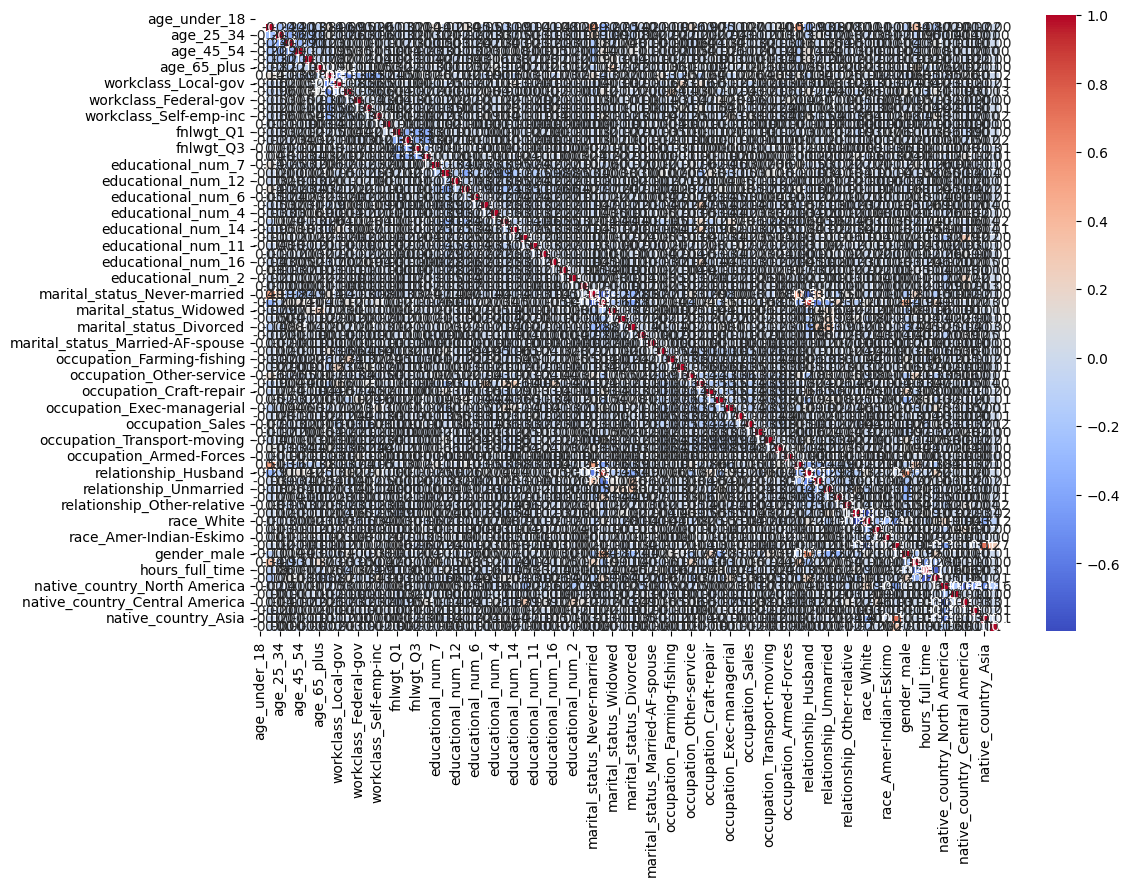

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = X_binarized.corr()

# Plot the heatmap to visually inspect correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Drop highly correlated features
threshold = 0.5  # You can adjust this threshold
drop_columns = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            drop_columns.add(colname)

X_reduced = X_binarized.drop(columns=drop_columns)
print(f'Removed columns: {drop_columns}')

In [36]:
X_reduced

,age_under_18,age_18_24,age_25_34,age_35_44,age_45_54,age_55_64,age_65_plus,workclass_Private,workclass_Local-gov,workclass_Federal-gov,...,race_Black,race_Other,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,hours_part_time,hours_full_time,native_country_North America,native_country_South America,native_country_Europe,native_country_Other
0,False,False,True,False,False,False,False,True,False,False,...,True,False,False,False,False,True,True,False,False,False
1,False,False,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
2,False,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,True,True,False,False,False
3,False,False,False,False,True,False,False,True,False,False,...,True,False,False,False,False,True,True,False,False,False
5,False,False,False,True,False,False,False,True,False,False,...,False,False,False,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,False,False,True,False,False,False,False,True,False,False,...,False,False,False,False,False,True,True,False,False,False
48838,False,False,False,True,False,False,False,True,False,False,...,False,False,False,False,False,True,True,False,False,False
48839,False,False,False,False,False,True,False,True,False,False,...,False,False,False,False,False,True,True,False,False,False
48840,False,True,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,True,False,False,False
